In [1]:
# Generic ones
import numpy as np
import pandas as pd
import os

# Word processing libraries
import re
from nltk.corpus import wordnet
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

# Widen the size of each cell
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
import glob
import gzip

# dfs=[]
data = None
total_count=0
keywords_str='#chinavirus|#wuhanvirus|#chopstickflu|#kungfuvirus|#chinesevirus|#kungflu|#communistvirus|#wuhancoronavirus|#coronajihad'
print('filtering by:', keywords_str)

for file in glob.glob("E:\\Projects\\twitter_covid\\2020-02\\*.gz"):
    print(file)
    df = pd.read_json(path_or_buf=file, lines=True, compression='infer')
#     print('Read. Size: ', df.shape)
    
    total_count+=df.shape[0]
    df = df[df['full_text'].str.contains("(?i)"+keywords_str)]
    df.reset_index(inplace = True, drop = True)
    if data is None:
        data = df
    else:
        data = pd.concat([data, df], axis = 0)
        # Reset_index
        data.reset_index(inplace = True, drop = True)
        
data_orig=data.copy()

print('Size of dataset before filtering:', total_count)
print('Size of dataset after filtering:', data.shape[0])



filtering by: #chinavirus|#wuhanvirus|#chopstickflu|#kungfuvirus|#chinesevirus|#kungflu|#communistvirus|#wuhancoronavirus|#coronajihad
E:\Projects\twitter_covid\2020-02\coronavirus-tweet-id-2020-02-01-14.jsonl.gz
E:\Projects\twitter_covid\2020-02\coronavirus-tweet-id-2020-02-02-01.jsonl.gz
E:\Projects\twitter_covid\2020-02\coronavirus-tweet-id-2020-02-02-04.jsonl.gz
E:\Projects\twitter_covid\2020-02\coronavirus-tweet-id-2020-02-02-08.jsonl.gz
E:\Projects\twitter_covid\2020-02\coronavirus-tweet-id-2020-02-02-12.jsonl.gz
E:\Projects\twitter_covid\2020-02\coronavirus-tweet-id-2020-02-02-14.jsonl.gz
E:\Projects\twitter_covid\2020-02\coronavirus-tweet-id-2020-02-02-19.jsonl.gz
E:\Projects\twitter_covid\2020-02\coronavirus-tweet-id-2020-02-03-07.jsonl.gz
E:\Projects\twitter_covid\2020-02\coronavirus-tweet-id-2020-02-03-11.jsonl.gz
E:\Projects\twitter_covid\2020-02\coronavirus-tweet-id-2020-02-04-04.jsonl.gz
E:\Projects\twitter_covid\2020-02\coronavirus-tweet-id-2020-02-04-06.jsonl.gz
E:\Proj

In [3]:
data['hashtags'] = data['entities'].apply(lambda x: x['hashtags'])
data['hashtags'].head(3)

0    [{'text': 'WuhanCoronavirus', 'indices': [70, ...
1    [{'text': 'WuhanCoronavirus', 'indices': [35, ...
2    [{'text': 'coronavirus', 'indices': [62, 74]},...
Name: hashtags, dtype: object

In [4]:
# Remove empty tweets
data.dropna(subset = ['full_text'], inplace = True)
# The unicode accounts for Chinese characters and punctuations.
def strip_chinese_words(string):
    # list of english words
    en_list = re.findall(u'[^\u4E00-\u9FA5\u3000-\u303F]', str(string))
    
    # Remove word from the list, if not english
    for c in string:
        if c not in en_list:
            string = string.replace(c, '')
    return string
# Apply strip_chinese_words(...) on the column 'text'
data['full_text'] = data['full_text'].apply(lambda x: strip_chinese_words(x))
data.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,favorited,retweeted,possibly_sensitive,lang,extended_entities,retweeted_status,withheld_in_countries,withheld_scope,withheld_copyright,hashtags
0,2020-02-01 14:08:25+00:00,1223609047833661443,1223609047833661440,RT @imshinbei: 1-2-2020 20:45\n\nHong Kong has...,False,"[0, 140]","{'hashtags': [{'text': 'WuhanCoronavirus', 'in...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,...,False,False,NaN,en,NaN,{'created_at': 'Sat Feb 01 12:49:07 +0000 2020...,NaN,NaN,NaN,"[{'text': 'WuhanCoronavirus', 'indices': [70, ..."
1,2020-02-01 14:08:27+00:00,1223609058407546880,1223609058407546880,RT @hu_jia: ，“”#WuhanCoronavirus #ChinaCoronaV...,False,"[0, 81]","{'hashtags': [{'text': 'WuhanCoronavirus', 'in...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,...,False,False,NaN,zh,NaN,{'created_at': 'Sat Feb 01 13:15:44 +0000 2020...,NaN,NaN,NaN,"[{'text': 'WuhanCoronavirus', 'indices': [35, ..."
2,2020-02-01 14:08:30+00:00,1223609068696281089,1223609068696281088,Coronavirus Lurking in Feces May Reveal Hidden...,False,"[0, 149]","{'hashtags': [{'text': 'coronavirus', 'indices...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,...,False,False,0.0,en,NaN,NaN,NaN,NaN,NaN,"[{'text': 'coronavirus', 'indices': [62, 74]},..."
3,2020-02-01 14:08:30+00:00,1223609070130626560,1223609070130626560,"#WuhanCoronavirusOutbreak Map for February 1, ...",False,"[0, 122]",{'hashtags': [{'text': 'WuhanCoronavirusOutbre...,"<a href=""http://twitter.com/download/android"" ...",NaN,NaN,...,False,False,0.0,en,"{'media': [{'id': 1223609051671457793, 'id_str...",NaN,NaN,NaN,NaN,"[{'text': 'WuhanCoronavirusOutbreak', 'indices..."
4,2020-02-01 14:08:31+00:00,1223609074463338497,1223609074463338496,I feel really sad for ppl who’re brave enough ...,False,"[0, 189]",{'hashtags': [{'text': 'WuhanCoronavirusOutbre...,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,False,False,0.0,en,NaN,NaN,NaN,NaN,NaN,"[{'text': 'WuhanCoronavirusOutbreak', 'indices..."


In [5]:
# Define function to sieve out @users in a tweet:
def mentioned_users(string):
    usernames = re.findall('@[^\s]+', string)
    return usernames
# Create a new column and apply the function on the column 'text'
data['mentioned_users'] = data['full_text'].apply(lambda x: mentioned_users(x))
data.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,retweeted,possibly_sensitive,lang,extended_entities,retweeted_status,withheld_in_countries,withheld_scope,withheld_copyright,hashtags,mentioned_users
0,2020-02-01 14:08:25+00:00,1223609047833661443,1223609047833661440,RT @imshinbei: 1-2-2020 20:45\n\nHong Kong has...,False,"[0, 140]","{'hashtags': [{'text': 'WuhanCoronavirus', 'in...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,...,False,NaN,en,NaN,{'created_at': 'Sat Feb 01 12:49:07 +0000 2020...,NaN,NaN,NaN,"[{'text': 'WuhanCoronavirus', 'indices': [70, ...",[@imshinbei:]
1,2020-02-01 14:08:27+00:00,1223609058407546880,1223609058407546880,RT @hu_jia: ，“”#WuhanCoronavirus #ChinaCoronaV...,False,"[0, 81]","{'hashtags': [{'text': 'WuhanCoronavirus', 'in...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,...,False,NaN,zh,NaN,{'created_at': 'Sat Feb 01 13:15:44 +0000 2020...,NaN,NaN,NaN,"[{'text': 'WuhanCoronavirus', 'indices': [35, ...",[@hu_jia:]
2,2020-02-01 14:08:30+00:00,1223609068696281089,1223609068696281088,Coronavirus Lurking in Feces May Reveal Hidden...,False,"[0, 149]","{'hashtags': [{'text': 'coronavirus', 'indices...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,...,False,0.0,en,NaN,NaN,NaN,NaN,NaN,"[{'text': 'coronavirus', 'indices': [62, 74]},...",[]
3,2020-02-01 14:08:30+00:00,1223609070130626560,1223609070130626560,"#WuhanCoronavirusOutbreak Map for February 1, ...",False,"[0, 122]",{'hashtags': [{'text': 'WuhanCoronavirusOutbre...,"<a href=""http://twitter.com/download/android"" ...",NaN,NaN,...,False,0.0,en,"{'media': [{'id': 1223609051671457793, 'id_str...",NaN,NaN,NaN,NaN,"[{'text': 'WuhanCoronavirusOutbreak', 'indices...",[]
4,2020-02-01 14:08:31+00:00,1223609074463338497,1223609074463338496,I feel really sad for ppl who’re brave enough ...,False,"[0, 189]",{'hashtags': [{'text': 'WuhanCoronavirusOutbre...,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,False,0.0,en,NaN,NaN,NaN,NaN,NaN,"[{'text': 'WuhanCoronavirusOutbreak', 'indices...",[]


In [6]:
# Define Emoji_patterns
emoji_pattern = re.compile("["
         u"\U0001F600-\U0001F64F"  # emoticons
         u"\U0001F300-\U0001F5FF"  # symbols & pictographs
         u"\U0001F680-\U0001F6FF"  # transport & map symbols
         u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
         u"\U00002702-\U000027B0"
         u"\U000024C2-\U0001F251"
         "]+", flags=re.UNICODE)
# Define the function to implement POS tagging:
def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
# Define the main function to clean text in various ways:
def clean_text(text):
    
    # Apply regex expressions first before converting string to list of tokens/words:
    # 1. remove @usernames
    text = re.sub('@[^\s]+', '', text)
    
    # 2. remove URLs
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', text)
    
    # 3. remove hashtags entirely i.e. #hashtags
    text = re.sub(r'#([^\s]+)', '', text)
    
    # 4. remove emojis
    text = emoji_pattern.sub(r'', text)
    
    # 5. Convert text to lowercase
    text = text.lower()
    
    # 6. tokenise text and remove punctuation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    
    # 7. remove numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    
    # 8. remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    
    # 9. remove empty tokens
    text = [t for t in text if len(t) > 0]
    
    # 10. pos tag text and lemmatize text
    pos_tags = pos_tag(text)
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    
    # 11. remove words with only one letter
    text = [t for t in text if len(t) > 1]
    
    # join all
    text = " ".join(text)
    
    return(text)
# Apply function on the column 'text':
data['cleaned_text'] = data['full_text'].apply(lambda x: clean_text(x))
data.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,possibly_sensitive,lang,extended_entities,retweeted_status,withheld_in_countries,withheld_scope,withheld_copyright,hashtags,mentioned_users,cleaned_text
0,2020-02-01 14:08:25+00:00,1223609047833661443,1223609047833661440,RT @imshinbei: 1-2-2020 20:45\n\nHong Kong has...,False,"[0, 140]","{'hashtags': [{'text': 'WuhanCoronavirus', 'in...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,...,NaN,en,NaN,{'created_at': 'Sat Feb 01 12:49:07 +0000 2020...,NaN,NaN,NaN,"[{'text': 'WuhanCoronavirus', 'indices': [70, ...",[@imshinbei:],rt kong suspected case year old male travel ja…
1,2020-02-01 14:08:27+00:00,1223609058407546880,1223609058407546880,RT @hu_jia: ，“”#WuhanCoronavirus #ChinaCoronaV...,False,"[0, 81]","{'hashtags': [{'text': 'WuhanCoronavirus', 'in...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,...,NaN,zh,NaN,{'created_at': 'Sat Feb 01 13:15:44 +0000 2020...,NaN,NaN,NaN,"[{'text': 'WuhanCoronavirus', 'indices': [35, ...",[@hu_jia:],rt “”
2,2020-02-01 14:08:30+00:00,1223609068696281089,1223609068696281088,Coronavirus Lurking in Feces May Reveal Hidden...,False,"[0, 149]","{'hashtags': [{'text': 'coronavirus', 'indices...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,...,0.0,en,NaN,NaN,NaN,NaN,NaN,"[{'text': 'coronavirus', 'indices': [62, 74]},...",[],coronavirus lurk feces may reveal hidden risk ...
3,2020-02-01 14:08:30+00:00,1223609070130626560,1223609070130626560,"#WuhanCoronavirusOutbreak Map for February 1, ...",False,"[0, 122]",{'hashtags': [{'text': 'WuhanCoronavirusOutbre...,"<a href=""http://twitter.com/download/android"" ...",NaN,NaN,...,0.0,en,"{'media': [{'id': 1223609051671457793, 'id_str...",NaN,NaN,NaN,NaN,"[{'text': 'WuhanCoronavirusOutbreak', 'indices...",[],map february \nthis seem spread much faster\n
4,2020-02-01 14:08:31+00:00,1223609074463338497,1223609074463338496,I feel really sad for ppl who’re brave enough ...,False,"[0, 189]",{'hashtags': [{'text': 'WuhanCoronavirusOutbre...,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,0.0,en,NaN,NaN,NaN,NaN,NaN,"[{'text': 'WuhanCoronavirusOutbreak', 'indices...",[],feel really sad ppl who’re brave enough voice ...


In [7]:
# Define a function to perform this extraction:
def extract_hashtags(hashtag_list):
    # argument:
    # hashtag_list - a list of dictionary(ies), each containing a hashtag
    
    # Create a list to store the hashtags
    hashtags = []
    if isinstance(hashtag_list, float):
        hashtag_list=[]
    
    # Loop through the list:
    for i in range(0, len(hashtag_list)):
        # extract the hashtag value using the key - 'text'
        # For our purposes, we can ignore the indices, which tell us the position of the hashtags in the string of tweet
        # lowercase the text as well
        hashtags.append(hashtag_list[i]['text'].lower())
        
    return hashtags
# Apply function on the column - data['hashtags']
data['hashtags'] = data['hashtags'].apply(lambda x: extract_hashtags(x))
# Check out the updated column 'hashtags'
print(data.head()['hashtags'])

0                                   [wuhancoronavirus]
1      [wuhancoronavirus, chinacoronavirus, chernobyl]
2    [coronavirus, wuhancoronavirusoutbreak, wuhanc...
3    [wuhancoronavirusoutbreak, coronavirus, corona...
4    [wuhancoronavirusoutbreak, wuhan, wuhancoronav...
Name: hashtags, dtype: object


In [8]:
#Show hashtags
        
data[data['hashtags'].apply(lambda x: True if len(x)>0 else False)]['hashtags']

0                                       [wuhancoronavirus]
1          [wuhancoronavirus, chinacoronavirus, chernobyl]
2        [coronavirus, wuhancoronavirusoutbreak, wuhanc...
3        [wuhancoronavirusoutbreak, coronavirus, corona...
4        [wuhancoronavirusoutbreak, wuhan, wuhancoronav...
                               ...                        
14408                                   [wuhancoronavirus]
14409    [wuhancoronavirus, coronavirus, covid19, covid...
14410    [coronavirus, coronaoutbreak, corona, virus, c...
14411                         [wuhanvirus, chinese, china]
14412    [coronavirus, coronaoutbreak, coronavirusoutbr...
Name: hashtags, Length: 14385, dtype: object

In [9]:
data['location'] = df.user.apply(lambda x: x['location'])
data['acctdesc'] = df.user.apply(lambda x: x['description'])
data[['location','acctdesc']].head(3)

,location,acctdesc
0,California,"#Maga Not a globalist, a servant of our Lord J..."
1,,
2,,https://t.co/xjc1DtX5jB


In [10]:
# Replace NaN (empty) values with n.a to indicate that the user did not state his location
# Define a function to handle this:
def remove_nan(text):
    if pd.isnull(text) == True: # entry is NaN
        text = 'n.a'
    else:
        # lowercase text for possible easy handling
        text = text.lower()
        
    return text
# Apply function on column - data['location']
data['location'] = data['location'].apply(lambda x: remove_nan(x))
# Check out the updated columns
print(data.head()['location'])
# Let's take a quick look at the value_counts()
data['location'].value_counts()

0                  california
1                            
2                            
3                            
4    british columbia, canada
Name: location, dtype: object


n.a                         14364
united states                  13
                               12
east coast, usa                 7
méxico city                     3
usa                             1
california                      1
toronto, ontario                1
northern california             1
british columbia, canada        1
bogotá, d.c., colombia          1
on earth                        1
光復香港 時代革命                       1
florida                         1
talsi                           1
bugolobi, kampala-uganda        1
worldwide                       1
hong kong                       1
geneva, il                      1
Name: location, dtype: int64

In [11]:
# Apply the function already defined above: remove_nan(...)
# Apply function on column - data['acctdesc']
data['acctdesc'] = data['acctdesc'].apply(lambda x: remove_nan(x))
# Check out the updated columns
print(data.head()['acctdesc'])

0    #maga not a globalist, a servant of our lord j...
1                                                     
2                              https://t.co/xjc1dtx5jb
3    we are a daily trending entertainment channel,...
4    💥🔙 🇨🇦 🏳️‍🌈 former ab oilfield 🤠 ▶️ working 2️⃣...
Name: acctdesc, dtype: object


In [12]:
# Importing VADER from NLTK
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# Create a sid object called SentimentIntensityAnalyzer()
sid = SentimentIntensityAnalyzer()
# Apply polarity_score method of SentimentIntensityAnalyzer()
data['sentiment'] = data['cleaned_text'].apply(lambda x: sid.polarity_scores(x))
# Keep only the compound scores under the column 'Sentiment'
data = pd.concat([data.drop(['sentiment'], axis = 1), data['sentiment'].apply(pd.Series)], axis = 1)

In [13]:
# New column: number of characters in 'review'
data['numchars'] = data['cleaned_text'].apply(lambda x: len(x))
# New column: number of words in 'review'
data['numwords'] = data['cleaned_text'].apply(lambda x: len(x.split(" ")))
# Check the new columns:
data.tail(2)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,mentioned_users,cleaned_text,location,acctdesc,neg,neu,pos,compound,numchars,numwords
14411,2020-02-29 22:00:32+00:00,1233874720765960200,1233874720765960192,RT @vvvickie1: Deadly #WuhanVirus can’t wake t...,False,"[0, 140]","{'hashtags': [{'text': 'WuhanVirus', 'indices'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,[@vvvickie1:],rt deadly can’t wake sang song “without commun...,n.a,n.a,0.0,0.803,0.197,0.4019,69,12
14412,2020-02-29 22:00:10+00:00,1233874630470967296,1233874630470967296,First Aid Only FAE-4007 SmartCompliance Refill...,False,"[0, 254]","{'hashtags': [{'text': 'coronavirus', 'indices...","<a href=""https://buffer.com"" rel=""nofollow"">Bu...",NaN,NaN,...,[],first aid smartcompliance refill hand sanitize...,n.a,n.a,0.0,0.714,0.286,0.4939,63,9


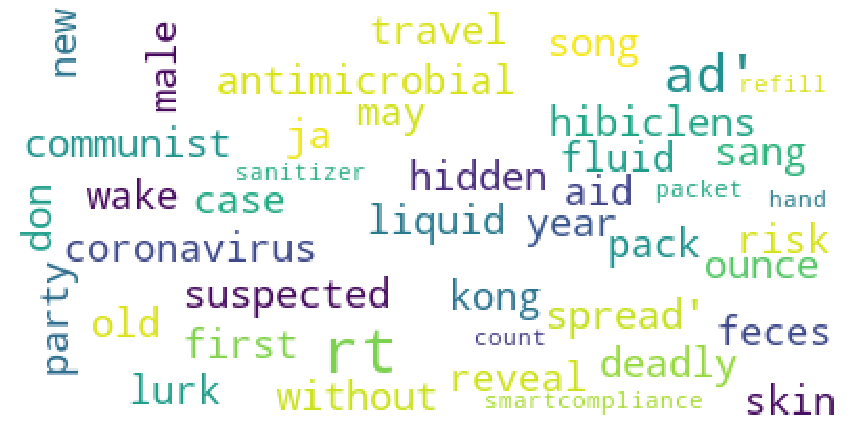

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 400,
        max_font_size = 30, 
        scale = 1,
        random_state = 1
    ).generate(str(data))
    fig = plt.figure(1, figsize = (15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)
    plt.imshow(wordcloud)
    plt.show()
    
show_wordcloud(data['cleaned_text'].values)

In [15]:
# the column data['hashtags'] returns a list of string(s) for each tweet. Build a list of all hashtags in the dataset.
hashtag_list = []
for i in range(0, len(data)):
    # Obtain the current list of hashtags
    curr_hashtag = data.iloc[i, :]['hashtags']
    
    # Extract and append the hashtags to 'hashtag_list':
    for j in range(0, len(curr_hashtag)):
        hashtag_list.append(curr_hashtag[j])
        
# No. of hashtags
print('No. of hashtags used in {} tweets is {}'.format(len(data), len(hashtag_list)))

df_hashtag = pd.DataFrame(
    {'hashtags': hashtag_list}
)
print(df_hashtag.head(20))
print('Shape of df_hashtag is:', df_hashtag.shape)

No. of hashtags used in 14413 tweets is 53360
                    hashtags
0           wuhancoronavirus
1           wuhancoronavirus
2           chinacoronavirus
3                  chernobyl
4                coronavirus
5   wuhancoronavirusoutbreak
6           wuhancoronavirus
7                      china
8   wuhancoronavirusoutbreak
9                coronavirus
10          coronavirusindia
11  wuhancoronavirusoutbreak
12                     wuhan
13          wuhancoronavirus
14                   chinazi
15                     china
16          chinesepneumonia
17          wuhancoronavirus
18                  jaejoong
19          wuhancoronavirus
Shape of df_hashtag is: (53360, 1)


                      hashtags  counts
3044          wuhancoronavirus    9375
696                coronavirus    4357
3099                wuhanvirus    3630
3035                     wuhan    2653
472                      china    2575
517                 chinavirus    1613
818                    covid19    1314
763        coronavirusoutbreak    1233
3051  wuhancoronavirusoutbreak    1070
707           coronaviruschina     668
3088            wuhanpneumonia     587
485           chinacoronavirus     557
1429                  hongkong     492
3540                      武漢肺炎     462
12                    2019ncov     369
3039                wuhanchina     365
425                        ccp     357
1982                  ncov2019     345
649                     corona     341
431                   ccpchina     336
666             coronaoutbreak     325
3516                      武汉肺炎     323
3512                      武汉疫情     317
835                  covid2019     296
3084             wuhanout

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 27494 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 28450 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 32954 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 28814 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 27721 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 30123 missing from c

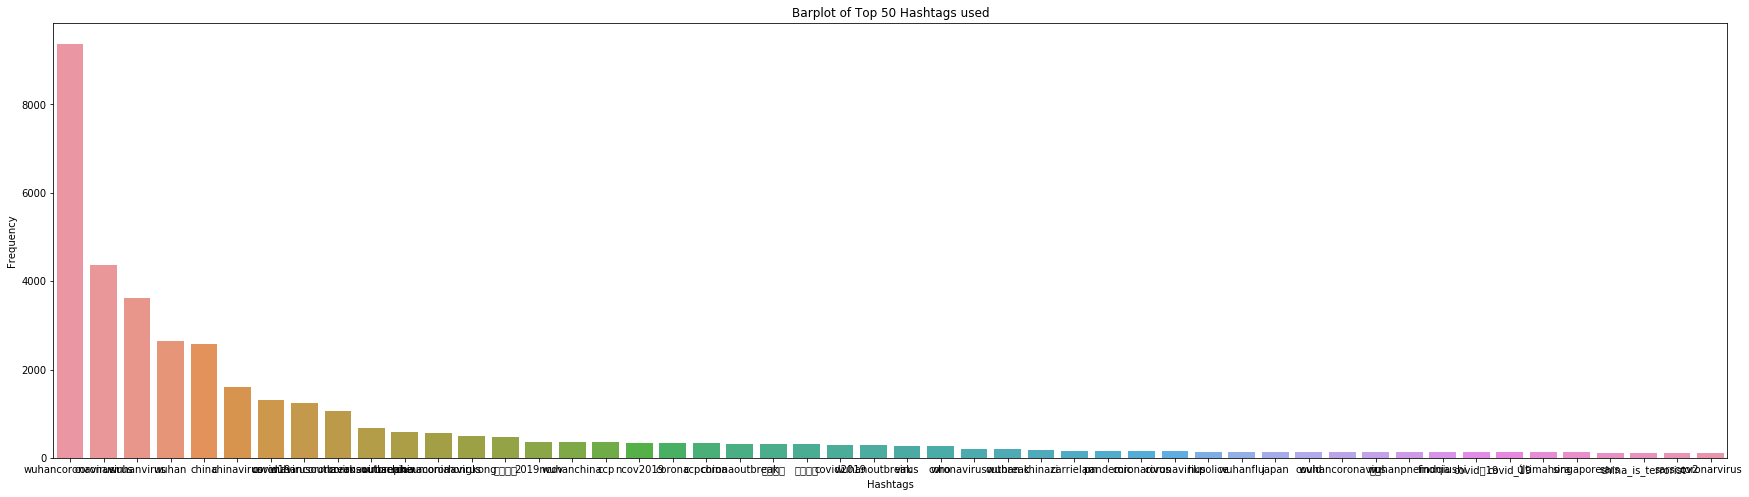

In [16]:
import seaborn as sns

# Define N to be the top number of hashtags
N = 50
top_hashtags = df_hashtag.groupby(['hashtags']).size().reset_index(name = 'counts').sort_values(by = 'counts', ascending = False).head(N)
print(top_hashtags)
# seaborn countplot on the top N hashtags
plt.figure(figsize=(30,8))
sns.set_palette('PuBuGn_d')
sns.barplot(x = 'hashtags', y = 'counts', data = top_hashtags)
plt.title('Barplot of Top ' + str(N) + ' Hashtags used')
plt.xlabel('Hashtags')
plt.ylabel('Frequency')
plt.show()

In [17]:
def isNaN(num):
    return num != num

def get_full_name(x):
    if x is None or isNaN(x):
        return None
    else:
        return x['full_name']
data['place_full_name']=data['place'].apply(lambda x: get_full_name(x))

data[data['place_full_name'].apply(lambda x: x is not None)]

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,cleaned_text,location,acctdesc,neg,neu,pos,compound,numchars,numwords,place_full_name
100,2020-02-01 14:16:54+00:00,1223611184450035712,1223611184450035712,Oremos por #Wuhan #ChinaWuHan #WuhanCoronaviru...,False,"[0, 96]","{'hashtags': [{'text': 'Wuhan', 'indices': [11...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,...,oremos por deus traga cura em nome de jesus cr...,n.a,n.a,0.000,1.000,0.000,0.0000,50,10,"Porto Alegre, Brazil"
206,2020-02-01 14:49:14+00:00,1223619321894563840,1223619321894563840,"#H5N1 bird flu detected in #Shaoyang, central ...",False,"[0, 238]","{'hashtags': [{'text': 'H5N1', 'indices': [0, ...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,bird flu detect central province chicken infect,n.a,n.a,0.302,0.698,0.000,-0.3818,47,7,"Goa, India"
239,2020-02-01 14:51:52+00:00,1223619982740901888,1223619982740901888,While many countries are evacuating their citi...,False,"[0, 270]","{'hashtags': [{'text': 'coronarovirus', 'indic...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,many country evacuate citizen wuhan pakistani ...,n.a,n.a,0.122,0.719,0.158,0.1891,122,18,"Hubei, People's Republic of China"
471,2020-02-02 01:15:18+00:00,1223776874209382400,1223776874209382400,#benceCorona Amerika'nın Çin nüfusunu azaltma ...,False,"[0, 80]","{'hashtags': [{'text': 'benceCorona', 'indices...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,...,amerika'nın çin nüfusunu azaltma çabası,n.a,n.a,0.000,1.000,0.000,0.0000,39,5,"Gaziantep, Türkiye"
591,2020-02-02 01:57:29+00:00,1223787489522933761,1223787489522933760,WUHAN Virus I slap you than you know.. \n\n#wu...,False,"[0, 65]","{'hashtags': [{'text': 'wuhanvirus', 'indices'...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,...,wuhan virus slap know \n\n,n.a,n.a,0.000,0.652,0.348,0.1531,24,5,"Central Region, Singapore"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14198,2020-02-29 06:05:31+00:00,1233634382063140864,1233634382063140864,#HongKong asylum seekers hit by #Taiwan’s coro...,False,"[0, 154]","{'hashtags': [{'text': 'HongKong', 'indices': ...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,...,asylum seeker hit coronavirus travel ban,n.a,n.a,0.419,0.581,0.000,-0.5574,40,6,"Wan Chai District, Hong Kong"
14261,2020-02-29 14:15:57+00:00,1233757805200334850,1233757805200334848,Finally some decency within the WHO\n#WorldHea...,False,"[0, 149]",{'hashtags': [{'text': 'WorldHealthOrganizatio...,"<a href=""http://twitter.com/download/android"" ...",NaN,NaN,...,finally decency within who\n\n\n\n\n\n\n,n.a,n.a,0.000,1.000,0.000,0.0000,33,4,"Suan Luang, Thailand"
14276,2020-02-29 19:03:39+00:00,1233830207401943044,1233830207401943040,Wie werden diese Menschen versorgt? Kommt da j...,False,"[0, 280]",{'hashtags': [{'text': 'WuhanCoronavirusOutbre...,"<a href=""http://twitter.com/download/android"" ...",NaN,NaN,...,wie werden diese menschen versorgt kommt da je...,n.a,n.a,0.000,1.000,0.000,0.0000,225,34,"Aachen, Germany"
14316,2020-02-29 19:39:50+00:00,1233839314649407488,1233839314649407488,That's #DonaldTrump...\nHe can also say that '...,False,"[0, 106]","{'hashtags': [{'text': 'DonaldTrump', 'indices...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,...,that's \nhe also say,n.a,n.a,0.000,1.000,0.000,0.0000,19,4,"Durgapur, India"


In [18]:
data[data['coordinates'].apply(lambda x: x is not None and not isNaN(x))]
# data['coordinates']

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,cleaned_text,location,acctdesc,neg,neu,pos,compound,numchars,numwords,place_full_name
3128,2020-02-04 06:33:54+00:00,1224581829799354369,1224581829799354368,Been feeling a little hoarse since my recent l...,False,"[0, 233]","{'hashtags': [{'text': 'wuhan', 'indices': [12...","<a href=""http://instagram.com"" rel=""nofollow"">...",NaN,NaN,...,feel little hoarse since recent long haul flig...,n.a,n.a,0.155,0.845,0.00,-0.2960,98,14,"Amphoe Phatthana Nikhom, Changwat Lop Buri"
4028,2020-02-06 07:57:12+00:00,1225327569400188930,1225327569400188928,[6 Feb 2020] #WHO/#WorldHealthOrganisation = C...,False,"[0, 184]","{'hashtags': [{'text': 'WHO', 'indices': [13, ...","<a href=""http://instagram.com"" rel=""nofollow"">...",NaN,NaN,...,feb china’s praise china contribution worldwid...,n.a,n.a,0.000,0.660,0.34,0.5574,68,8,"Paddington, London"



Wordcloud for Keyword:  chinazi


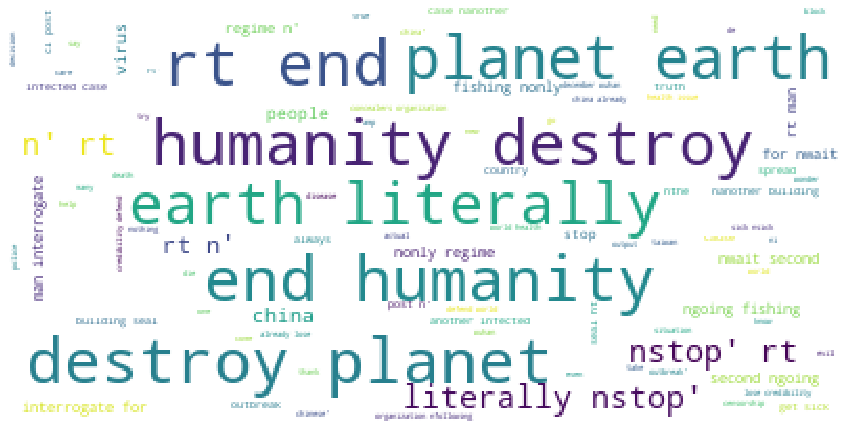


Wordcloud for Keyword:  kungflu


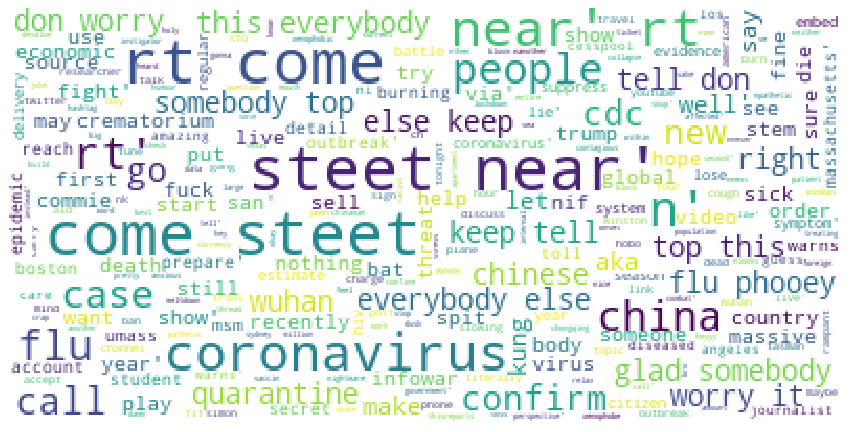


Wordcloud for Keyword:  wuhanvirus


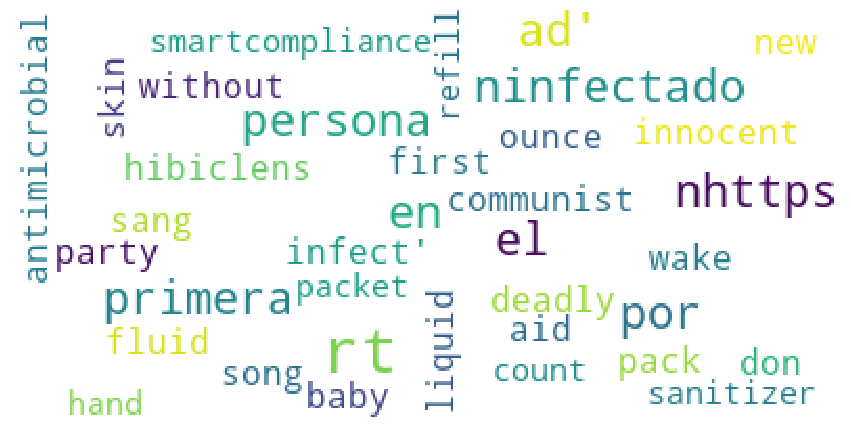


Wordcloud for Keyword:  chinavirus


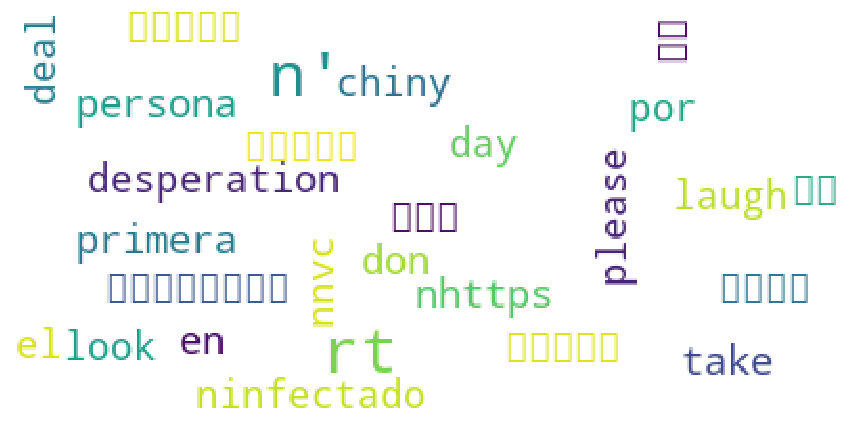

In [19]:
keyword_ts=['chinazi','kungflu','wuhanvirus','chinavirus']
for keyword_t in keyword_ts:
    print('\nWordcloud for Keyword: ', keyword_t)
    df_t = data[data['full_text'].str.contains("(?i)#"+keyword_t)]
    show_wordcloud(df_t['cleaned_text'].values)